# Wczytywanie rastrów

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

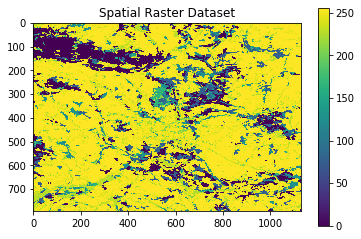

In [21]:
# Load the raster dataset
file_path = "../data/clc2012.tif"
with rasterio.open(file_path) as src:
    profile = src.profile
    raster_data = src.read(1)

# Plot the raster dataset
plt.imshow(raster_data, cmap='viridis')
plt.colorbar()
plt.title('Spatial Raster Dataset')
plt.show()


In [50]:

# Create a histogram of the raster values
plt.hist(raster_data.ravel(), bins=50, edgecolor='k')
plt.title('Histogram of Raster Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [51]:

# Find and display the maximum value of the raster
max_value = np.max(raster_data)
print(f"Maximum value of the raster: {max_value}")

Maximum value of the raster: 255


# Moving window

In [52]:
import numpy as np
import rasterio


In [53]:
def moving_window_median(input_raster, output_raster, window_size=3):
    with rasterio.open(input_raster) as src:
        profile = src.profile
        profile['dtype'] = 'float32'
        data = src.read(1)
        height, width = data.shape

        # Create an empty array to store the output
        output_data = np.zeros((height, width), dtype=np.float32)

        # Iterate through the raster using a moving window
        for row in range(height - window_size + 1):
            for col in range(width - window_size + 1):
                window_data = data[row:row + window_size, col:col + window_size]
                median_value = np.median(window_data)
                output_data[row + window_size // 2, col + window_size // 2] = median_value

        # Write the output raster
        with rasterio.open(output_raster, 'w', **profile) as dst:
            dst.write(output_data, 1)

In [54]:
raster_data[200, 200] = 0
raster_data[200, 200]

0

In [55]:
input_raster = 'temp_clc.tif'
with rasterio.open(input_raster, 'w', **profile) as dst:
    dst.write(raster_data, 1)

In [56]:
with rasterio.open(input_raster) as src:
    raster_data_old = src.read(1)
raster_data_old[200,200]

0

In [46]:

output_raster = 'output_raster_corrected.tif'

In [47]:
moving_window_median(input_raster, output_raster, window_size=3)

In [49]:
with rasterio.open(output_raster) as src:
    raster_data_new = src.read(1)
raster_data_new[200,200]

250.0

In [57]:
# Obliczanie dystansu

In [58]:
profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1129, 'height': 794, 'count': 4, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0011165227936226756, 0.0, 16.287662099,
       0.0, -0.0011165227936226756, 52.89080091606821), 'tiled': False, 'interleave': 'pixel'}